# Housing Amenities
Project 1, Group 5 <br>
K. Harrison

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [30]:
#read in dataset.  Dataset from Zillow.
file = 'data/properties_2016.csv'
df_raw = pd.read_csv(file)

In [31]:
#Clean data.  Data contains 2.9M data points
#remove properties with no value
df = df_raw.dropna(subset = ['structuretaxvaluedollarcnt'])

#remove listings with 0 bedrooms or bathrooms
df_box = df[['bedroomcnt', 'bathroomcnt']]
df_box1 = df_box[df_box['bedroomcnt']  > 0]
df_box2 = df_box1[df_box1['bathroomcnt']  > 0]

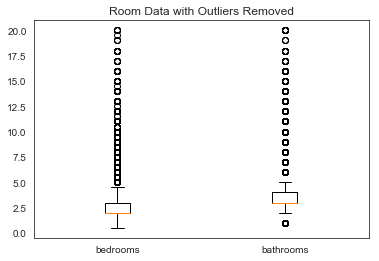

In [32]:
#create boxplot to determine the outliers
data = (df_box2['bathroomcnt'], df_box2['bedroomcnt'])
labels = ['bedrooms', 'bathrooms']
fig1, ax1 = plt.subplots()
ax1.set_title('Room Data with Outliers Removed')
ax1.boxplot(data, showfliers=True, labels=labels)
plt.savefig('figures/BoxPlotofBedBath.png')
plt.show()

In [6]:
#set parameters for graphing.  I'm using $2M as the upper limit to show bedroom densities
#lower limit is to filter out properties which are believed to be errors
upper_limit = 2000000
lower_limit = 100000

#filter data by values
df_bed = df_raw[['bedroomcnt', 'taxvaluedollarcnt']]
df_bed = df_bed[df_bed['taxvaluedollarcnt'].between(lower_limit, upper_limit, inclusive=True)]
df_bed = df_bed[df_bed['bedroomcnt'].between(1, 5, inclusive=True)]

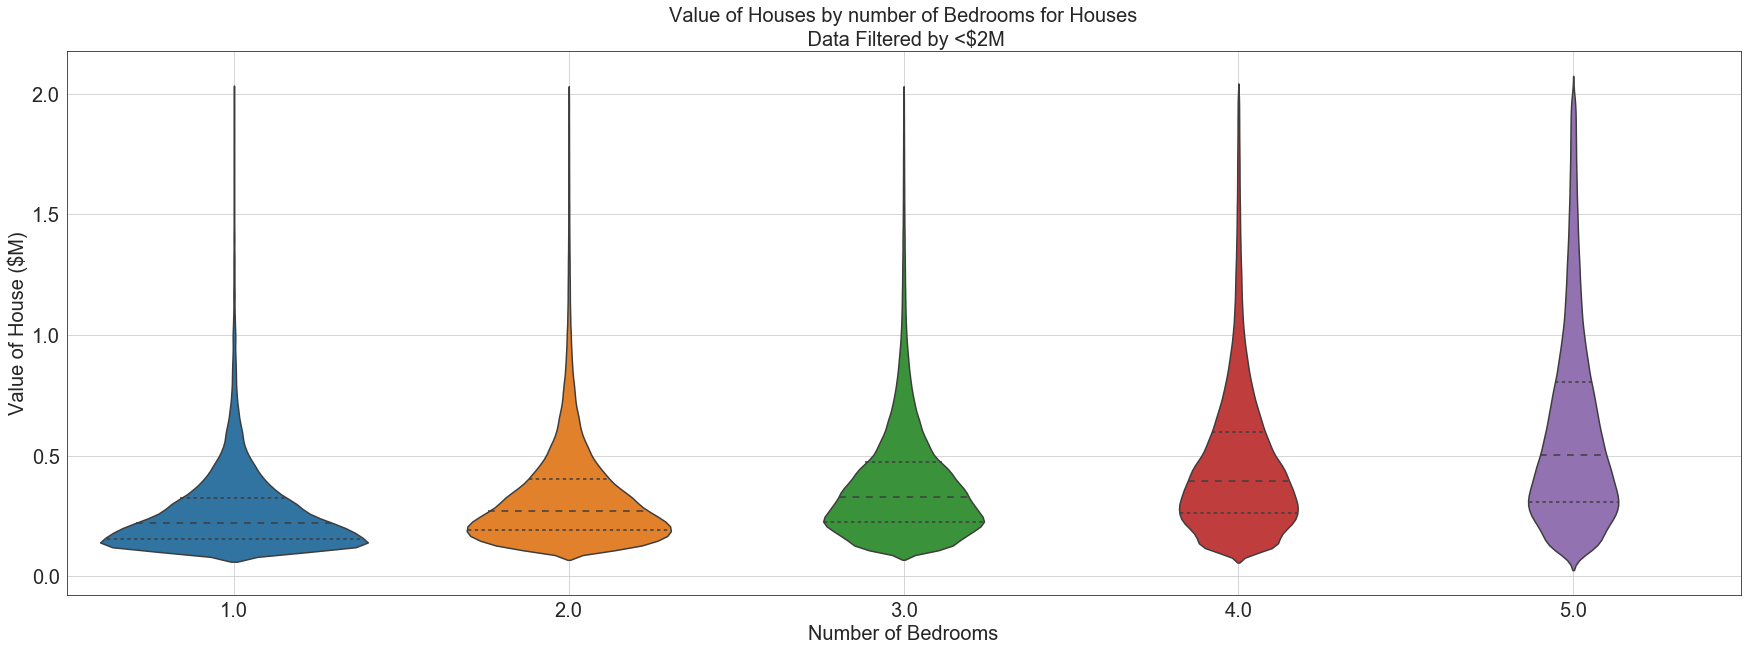

In [33]:
#set violin plot parameters
figsize=30,10
fontsize=20
fig2, ax2 = plt.subplots(figsize=figsize)

#create seaborn violin plot
ax2 = sns.violinplot(x=df_bed['bedroomcnt'], y=df_bed['taxvaluedollarcnt']/1000000, inner='quartile')
sns.set_style('white')

#graph formatting
plt.title('Value of Houses by number of Bedrooms for Houses\n Data Filtered by <$2M', fontsize=fontsize)
plt.xlabel('Number of Bedrooms', fontsize=fontsize)
plt.ylabel('Value of House ($M)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.grid()

#save and show figure
plt.savefig('figures/ViolinPlotOfBedrooms')
plt.show()

In [8]:
# sample_size = 50000

# df_bed2 = df_raw[['bedroomcnt', 'taxvaluedollarcnt']]

# one_bed = df_bed2[df_bed2['bedroomcnt'] == 1]['taxvaluedollarcnt'].sample(sample_size)
# two_bed = df_bed2[df_bed2['bedroomcnt'] == 2]['taxvaluedollarcnt'].sample(sample_size)
# three_bed = df_bed2[df_bed2['bedroomcnt'] == 3]['taxvaluedollarcnt'].sample(sample_size)
# four_bed = df_bed2[df_bed2['bedroomcnt'] == 4]['taxvaluedollarcnt'].sample(sample_size)
# five_bed = df_bed2[df_bed2['bedroomcnt'] == 5]['taxvaluedollarcnt'].sample(sample_size)

In [9]:
#filter out outliers as determined from boxplot
df_rooms = df_raw[['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt']]
df_rooms = df_rooms[df_rooms['bedroomcnt']<7]
df_rooms = df_rooms[df_rooms['bathroomcnt']<5]

In [34]:
#format dataframes for heatmap (needs to be pivoted)
c = df_rooms[df_rooms['bedroomcnt']>0]
c = c[c['bathroomcnt'] > .5]
a = c.groupby(['bedroomcnt', 'bathroomcnt']).mean()

In [35]:
#create heatmap data and convert to a dataframe
b = a.reset_index()
x_axis = b['bedroomcnt']
y_axis = b['bathroomcnt']
z_axis = b['taxvaluedollarcnt']/1000000

df_heatmap = pd.DataFrame({
    'bathrooms': y_axis,
    'bedrooms': x_axis,
    'value': z_axis
})

#pivot data for heatmap plot
df_heatmap1 = df_heatmap.pivot('bathrooms', 'bedrooms', 'value')

#clean problematic datapoints and display
df_heatmap1 = df_heatmap1.drop([1.75, 4.5])
df_heatmap1

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0
bathrooms,,,,,,
1.0,0.212536,0.232117,0.235880,0.257809,0.284787,0.336849
1.5,0.308072,0.246214,0.257050,0.262252,0.300320,0.542763
2.0,0.392134,0.323409,0.310978,0.304459,0.316874,0.349604
2.5,0.442967,0.401496,0.460619,0.465632,0.422188,0.430254
3.0,0.627779,0.475251,0.478917,0.492547,0.477848,0.408164
3.5,1.098602,1.087876,1.057133,0.895946,0.726880,0.573218
4.0,1.040472,1.049602,1.037821,0.837863,0.765385,0.561494


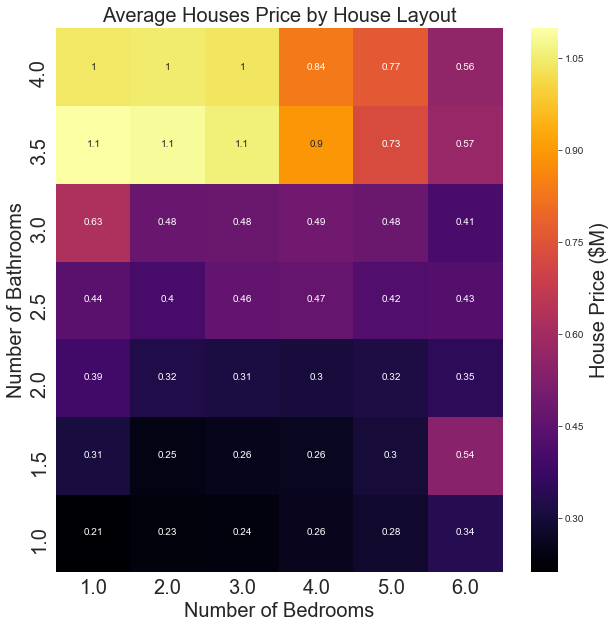

In [36]:
#create hitmap from pivot chart
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3 = sns.heatmap(df_heatmap1, cmap='inferno', annot=True, cbar_kws={'label': 'House Price ($M)'})
ax3.invert_yaxis()

#format graph
plt.title('Average Houses Price by House Layout', fontsize=20)
plt.xlabel('Number of Bedrooms', fontsize=20)
plt.ylabel("Number of Bathrooms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=(20))
ax3.figure.axes[-1].yaxis.label.set_size(20)

#save figure and display
plt.savefig('figures/HousingLayoutHeatMap.png')
plt.show()